# **Twitter Data set for Arabic Sentiment Analysis**


We're trying to build a classifier texts for polarity, (positive and negative). By train machine, machines automatically learn how to detect sentiment without human input.

Since we're performing classification, we can use accuracy — the fraction of correctly classified sentiment  — to quantify how well our model is performing.  we should achieve at least **80%** accuracy.

the field researchers are collected data By using a tweet crawler at 2013, They collect 2000 labelled tweets (1000 positive tweets and 1000 negative ones) on various topics such as: politics and arts. These tweets include opinions written in both Modern Standard Arabic (MSA) and the Jordanian dialect.

The selected tweets convey some kind of feelings (positive or negative) and the objective of our model is to extract valuable information from such tweets in order to determine the sentiment orientation of the inputted text.
The months-long annotation process of the tweets is manually conducted mainly by two human experts (native speakers of Arabic). If both experts agree on the label of a certain tweet, then the tweet is assigned this label. Otherwise, a third expert is consulted to break the tie.

# Step 1: Load the Data

In [ ]:
# Get the dataset by raw URL
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00293/Twitter.rar

In [ ]:
#install unrar to unrar the data file
!pip install unrar
!unrar x /content/Twitter.rar

In [3]:
import pandas as pd


##  Create Data Frame
We have two files (Positive, Negative), each file have 1000 tweet, each tweet is in a single file, so it must be converted to one dataframe

In [4]:
# Read text files and creat list of dataframes
d=[]
# There was error while reading the data so I used Try method to cross the errors
for i in range(1,1001):
  try : 
    m = pd.read_csv(str('/content/Twitter/Positive/positive' + str(i) + '.txt'),header= None,)
    d.append(m)
  except:
    pass
len(d)

1000

In [ ]:
df = pd.concat(d, axis=0, ignore_index=True)
dfP=pd.DataFrame(df[0])
#Creat Emotion columns for positive emotion and name it 1
dfP['Emotion']= list([1]*1000)
dfP

In [6]:
d=[]
for i in range(1,1001):
  try :
    m = pd.read_csv(str('/content/Twitter/Negative/negative' + str(i) + '.txt'),header= None,)
    d.append(m)
  except:
    pass
len(d)

978

In [ ]:
df = pd.concat(d, axis=0, ignore_index=True)
dfN=pd.DataFrame(df[0])
#Creat emotion columns for negative emotion and name it 0
dfN['Emotion']= list([0]*978)
dfN

In [8]:
frames=[dfP,dfN]
df= pd.concat(frames,  axis=0, ignore_index=True)
df.columns=['tweet','Emotion']
df.head()

,tweet,Emotion
0,حقا,1
1,الحل الوحيد هو القرب من الله وذكره (الا بذكر...,1
2,وهذه من اكبر المشاكل التي تؤرق الشباب في هذه ...,1
3,الموت مع الناس رحمه..,1
4,اي صح و حاليا فاقده الاثنين,1


In [12]:
df.to_csv('2014_Jordanian_Tweets.csv', index=False)

In [ ]:
# Create new folder and name it data
!mkdir data

In [14]:
# Moving our datasets to the data folder
!mv 2014_Jordanian_Tweets.csv data/

In [15]:
# Showing the first line of the dataset
!head -n 1 data/2014_Jordanian_Tweets.csv

tweet,Emotion


In [16]:
# Showing the number of lines.
!cat data/2014_Jordanian_Tweets.csv | wc -l

1979


We have 1979 of instances

# Introduction
First of all I will use seven classification models to make real comparison between techniques to choose the best for our dataset, in the following shows Classification models names which I will use:

1.Logistic Regression

2.Linear Discriminant Analysis

3.K Neighbors Classifier

4.Decision Tree Classifier

5.Gaussian NB

6.Support Vector Classifier

7.XGBoost Classifier


# Step 2: Exploratory analysis and Check data for problems 

In [17]:
import pandas as pd
import numpy as np
from collections import Counter
import nltk
import pandas as pd
#from emoticons import EmoticonDetector
import re as regex
import numpy as np
#import plotly
#from plotly import graph_objs
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
#plotly.offline.init_notebook_mode()

import seaborn as sns
import plotly
import cufflinks as cf
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import SVC

models_2 = []
models_2.append(('LR', LogisticRegression()))
models_2.append(('RC', RidgeClassifier()))
models_2.append(('LSVC', LinearSVC()))
models_2.append(('SGDC', SGDClassifier()))
models_2.append(('P', Perceptron()))
models_2.append(('PAC', PassiveAggressiveClassifier()))
models_2.append(('BNB', BernoulliNB()))
models_2.append(('NC', NearestCentroid()))
models_2.append(('SVM', SVC()))

In [ ]:
df= pd.read_csv('/content/data/2014_Jordanian_Tweets.csv')
df

## Check for NaN value exist

In [17]:
df.isnull().sum().sum()

1

In [18]:
rows_with_nan = []
for index, row in df.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

print(rows_with_nan)

[812]


In [17]:
df.loc[[812]]

,tweet,Emotion
812,NaN,1


In [20]:
df= df.dropna()
df.isnull().sum().sum()

0

In [21]:
df['Emotion'].value_counts()

1    999
0    978
Name: Emotion, dtype: int64

## Using pie plot
I used *pie* plot to visualize and compute the difference between the categories

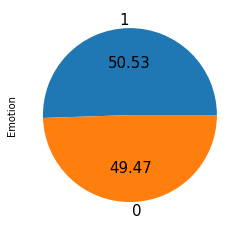

In [20]:
pd.value_counts(df['Emotion']).plot(kind='pie', autopct='%.2f',fontsize=15)

The classes is almost balanced.

## Using Arabic WordCloud

In [22]:
!pip install ar_wordcloud

     |████████████████████████████████| 368kB 4.3MB/s 
  Created wheel for arabic-reshaper: filename=arabic_reshaper-2.1.1-cp36-none-any.whl size=16504 sha256=dbc642763bdb4a67e6a90d073afc6ddb15945ad7c4561ec477fc02411da4f369
  Stored in directory: /root/.cache/pip/wheels/62/52/d8/bd0dcbf00f9e77e3bd0184285ed77dfa9c475dac494a5353d1
Successfully built arabic-reshaper
  Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0


In [5]:
!pip install arabic-reshaper

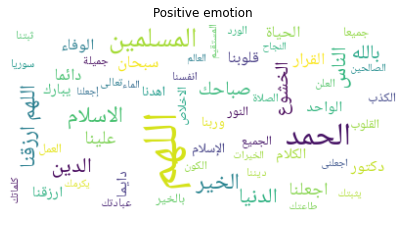

In [11]:
from wordcloud import wordcloud
from ar_wordcloud import ArabicWordCloud
import arabic_reshaper 
for emotion in df.Emotion.unique():
  #emotion='1'
  if emotion== 0:
    continue
  Data=' '.join(df[df['Emotion']==emotion]['tweet'].values)
  Data = arabic_reshaper.reshape(Data)
  stops=['الذنوب','اجعل','النهاية','عليك','المعاصي','دكتور']
  tokens =[word for word in Data.split() if len(word)>=5 and word not in stops ]
  Data=' '.join(tokens)


  awc = ArabicWordCloud(max_font_size=50, max_words=60, background_color="white")
  wc = awc.from_text(Data)
  plt.figure(figsize=(7,7))
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.title('Positive emotion')
plt.show()

From the Word Cloud, we can already see some issues with the data set:

1. There are negative words in the positive texts.

2. The meaningful words are mostly equal and bigger than 5 letters.

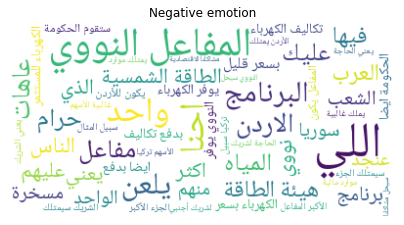

In [579]:
from wordcloud import wordcloud
from ar_wordcloud import ArabicWordCloud
import arabic_reshaper 
for emotion in df.Emotion.unique():
  #emotion='0'
  if emotion== 1:
    continue
  Data=' '.join(df[df['Emotion']==emotion]['tweet'].values)
  Data = arabic_reshaper.reshape(Data)
  stops=['اجعل','ايضا','يعني','دكتور']
  tokens =[word for word in Data.split() if len(word)>=4 and word not in stops ]
  Data=' '.join(tokens)


  awc = ArabicWordCloud(max_font_size=50, max_words=60, background_color="white")
  wc = awc.from_text(Data)
  plt.figure(figsize=(7,7))
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.title('Negative emotion')
plt.show()

## Show the text length Distribution for each emotion

In [581]:
df['Text_Len']= df['tweet'].apply(len)

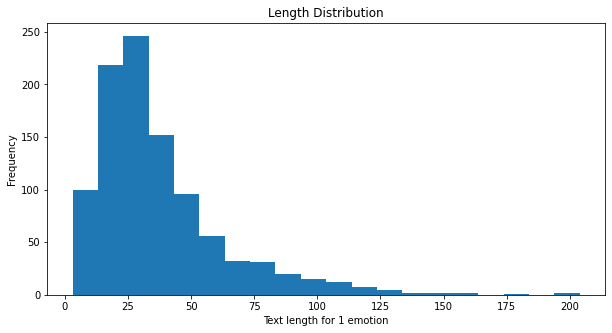

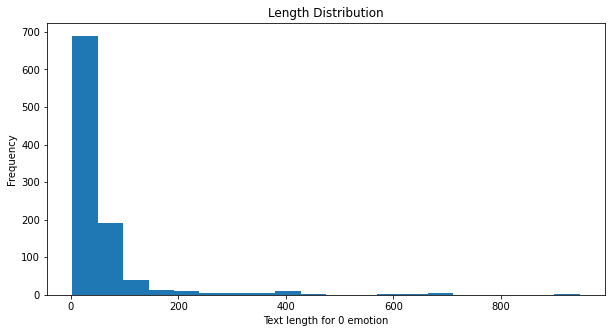

In [584]:
for emotion in df.Emotion.unique():
  df[df.Emotion==emotion]['Text_Len'].plot(
      kind='hist',
      bins=20,
      title='Length Distribution')
  plt.xlabel(f'Text length for {emotion} emotion')
  plt.show()

We seem to use very few words to express our negative feelings.

## Show The Most common words.

In [586]:
from collections import Counter
emotion= 1
Data=' '.join(df[df['Emotion']==emotion]['tweet'].values)
stops=[]
tokens =[word for word in Data.split() if len(word)>5 and word.lower() not in stops ]
dictWords=Counter(tokens).most_common(20)


In [588]:
Words=[i[0] for i in dictWords]
Freq=[i[1] for i in dictWords]

DF=pd.DataFrame({'Word':Words,'Freq':Freq})

Text(0.5, 1.0, 'Most frequent words for 1 emaotion')

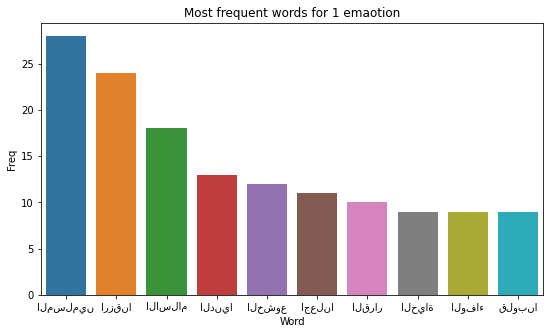

In [589]:
import seaborn as sns
plt.figure(figsize=(9,5))
sns.barplot(x=DF['Word'][0:10],y=DF['Freq'][0:10])
plt.title(f'Most frequent words for {emotion} emaotion')

In [590]:
from collections import Counter
emotion= 0
Data=' '.join(df[df['Emotion']==emotion]['tweet'].values)
stops=['وبالتالي', 'الاردن', 'الواحد', 'للأردن', 'سيمتلك', 'الأكبر', 'النووي']
tokens =[word.lower() for word in Data.split() if len(word)>5 and word.lower() not in stops ]
dictWords=Counter(tokens).most_common(20)

In [591]:
Words=[i[0] for i in dictWords]
Freq=[i[1] for i in dictWords]
import pandas as pd

DF=pd.DataFrame({'Word':Words,'Freq':Freq})

Text(0.5, 1.0, 'Most frequent words for 0 emaotion')

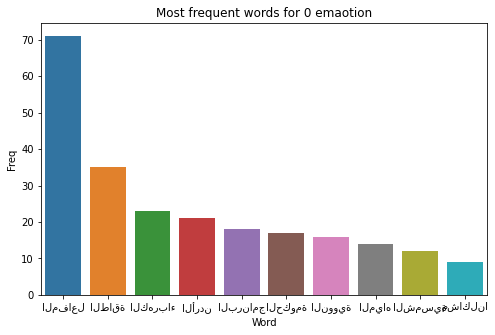

In [592]:
plt.figure(figsize=(8,5))
sns.barplot(x=DF['Word'][0:10],y=DF['Freq'][0:10])
plt.title(f'Most frequent words for {emotion} emaotion')

# Step 3: Features Extraction

## **1.** Without Arabic stemer

### Tokenization & stemming

In [22]:
# Function which directly tokenize the tweet data
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer( )

In [23]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [24]:
# create tokenize function
def tokenize(text):
    return word_tokenize(text)
# create steming function
def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)
    
    return stem_words

In [25]:
# apply tokenize function
df['text'] = df['tweet'].apply(tokenize)

In [26]:
# apply steming function
df['tokenized'] = df['text'].apply(stemming)

In [27]:
df.head()

,tweet,Emotion,text,tokenized
0,حقا,1,[حقا],[حقا]
1,الحل الوحيد هو القرب من الله وذكره (الا بذكر...,1,"[الحل, الوحيد, هو, القرب, من, الله, وذكره, (, ...","[الحل, الوحيد, هو, القرب, من, الله, وذكره, (, ..."
2,وهذه من اكبر المشاكل التي تؤرق الشباب في هذه ...,1,"[وهذه, من, اكبر, المشاكل, التي, تؤرق, الشباب, ...","[وهذه, من, اكبر, المشاكل, التي, تؤرق, الشباب, ..."
3,الموت مع الناس رحمه..,1,"[الموت, مع, الناس, رحمه..]","[الموت, مع, الناس, رحمه..]"
4,اي صح و حاليا فاقده الاثنين,1,"[اي, صح, و, حاليا, فاقده, الاثنين]","[اي, صح, و, حاليا, فاقده, الاثنين]"


### Features Word list

In [28]:
words = Counter()
for idx in df.index:
    words.update(df.loc[idx, "tokenized"])

words.most_common(5)

[('و', 716), ('الله', 385), ('من', 364), ('في', 230), ('يا', 227)]

In [29]:
len(words)

7033

In [30]:
nltk.download('stopwords')
stopwords= nltk.corpus.stopwords.words("arabic")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
stopwords[:11] 

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي']

Create white list: There is a meaningful words in the nltk stop words list especially in slang.

In [32]:
whitelist = ['أف', 'آه', 'بلى', 'إيه', 'أم', 'دون', 'حبذا']

Adding some slang stopwords and some punctuation

In [33]:
stop_words_add=['و', 'ان', 'انا', '.', '..', '...', 'اللي', 'الى', 'فى',
                'فى', 'لان', 'شي','لان', 'اشي', 'قبل', 'انو','او','هيك',
                'انت','احنا','اذا']

In [34]:
stopwords = stopwords+stop_words_add

Delete white word  from stopword list

In [35]:
for idx, stop_word in enumerate(stopwords):
    if stop_word not in whitelist:
        del words[stop_word]

Create features word list dataframe of most common words by the word frequency limitation

In [36]:
min_occurrences= 3 
max_occurences= 500
word_df = pd.DataFrame(data={"word":[k for k, v in words.most_common() if min_occurrences < v < max_occurences],"occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                       columns=["word", "occurrences"])
wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]

In [37]:
len(wordlist)

682

In [38]:
word_df.shape

(682, 2)

### Creat Data_model Dataframe

In [40]:
label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_prs",wordlist))
labels = []
rows = []
for idx in df.index:
    current_row = []
    
    # add label
    current_label = df.loc[idx, "Emotion"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(df.loc[idx, "text"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)


data_model

,label,الله_prs,اللهم_prs,!_prs,والله_prs,المفاعل_prs,مش_prs,ربنا_prs,النووي_prs,لله_prs,رب_prs,يارب_prs,صباح_prs,يعني_prs,الطاقة_prs,الحمد_prs,الي_prs,المسلمين_prs,شو_prs,واحد_prs,يكون_prs,الناس_prs,الا_prs,فعلا_prs,ارزقنا_prs,علي_prs,)_prs,جدا_prs,،_prs,علينا_prs,الكهرباء_prs,:_prs,انه_prs,``_prs,الأردن_prs,كلام_prs,بالله_prs,فيك_prs,ده_prs,البرنامج_prs,...,الابتعاد_prs,الأكيد_prs,عبر_prs,التجارب_prs,لهذه_prs,ديون_prs,مستقبلا_prs,الحصول_prs,الصخر_prs,الزيتي_prs,رايح_prs,البديلة_prs,صارت_prs,راحت_prs,.و_prs,نوويه_prs,دول_prs,خسارة_prs,اسمه_prs,ﻻ_prs,؟_prs,الاخوان_prs,لايك_prs,الاسد_prs,زبالة_prs,حالك_prs,هبل_prs,القرف_prs,يخرب_prs,مجانين_prs,سخافه_prs,برامج_prs,العاهات_prs,العود_prs,جايين_prs,هذول_prs,ثقيل_prs,المسخره_prs,عاهاتك_prs,يروحون_prs
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1975,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
data_model.shape

(1977, 683)

## Accureccy Evaluation

In [87]:
from sklearn.neighbors import NearestCentroid
all_inputs = data_model[data_model.columns[1:]].values
all_labels = data_model['label'].values

(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.1, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the classifier on the training set
cls = NearestCentroid()
cls.fit(X_train,y_train)
cls.score(X_test, y_test)

0.7878787878787878

In [43]:
data_model.to_csv('to_classification_df.csv',index=False)

## **2.** Using ISRI Stemmer to stem arabic words

In [ ]:
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()

w = 'حركات' 
st.stem(w)

'حرك'

### Tokenization & stemming

In [50]:
# Function which directly tokenize the tweet data
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer( )

In [51]:
from nltk.stem.isri import ISRIStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = ISRIStemmer()

In [52]:
# create tokenize function
def tokenize(text):
    return word_tokenize(text)
# create steming function
def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)
    
    return stem_words

In [53]:
# apply tokenize function
df['text'] = df['tweet'].apply(tokenize)

In [54]:
# apply steming function
df['tokenized'] = df['text'].apply(stemming)

In [55]:
df.head()

,tweet,Emotion,text,tokenized
0,حقا,1,[حقا],[حقا]
1,الحل الوحيد هو القرب من الله وذكره (الا بذكر...,1,"[الحل, الوحيد, هو, القرب, من, الله, وذكره, (, ...","[لحل, وحد, هو, قرب, من, الل, ذكر, (, الا, ذكر,..."
2,وهذه من اكبر المشاكل التي تؤرق الشباب في هذه ...,1,"[وهذه, من, اكبر, المشاكل, التي, تؤرق, الشباب, ...","[وهذ, من, كبر, شكل, التي, ؤرق, شبب, في, هذه, ايم]"
3,الموت مع الناس رحمه..,1,"[الموت, مع, الناس, رحمه..]","[موت, مع, ناس, رحمه..]"
4,اي صح و حاليا فاقده الاثنين,1,"[اي, صح, و, حاليا, فاقده, الاثنين]","[اي, صح, و, حال, فقد, اثن]"


### Features Word list

In [56]:
words = Counter()
for idx in df.index:
    words.update(df.loc[idx, "tokenized"])

words.most_common(5)

[('و', 716), ('الل', 456), ('من', 365), ('في', 231), ('يا', 227)]

In [57]:
len(words)

3422

In [58]:
nltk.download('stopwords')
stopwords= nltk.corpus.stopwords.words("arabic")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
stopwords[:11] 

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي']

Create white list: There is a meaningful words in the nltk stop words list especially in slang.

In [60]:
whitelist = ['أف', 'آه', 'بلى', 'إيه', 'أم', 'دون', 'حبذا']

Adding some slang stopwords and some punctuation

In [61]:
stop_words_add=['و', 'ان', 'انا', '.', '..', '...', 'اللي', 'الى', 'فى',
                'فى', 'لان', 'شي','لان', 'اشي', 'قبل', 'انو','او','هيك',
                'انت','احنا','اذا']

In [62]:
stopwords = stopwords+stop_words_add

Delete white word  from stopword list

In [63]:
for idx, stop_word in enumerate(stopwords):
    if stop_word not in whitelist:
        del words[stop_word]

Create features word list dataframe of most common words by the word frequency limitation

In [64]:
min_occurrences= 3 
max_occurences= 500
word_df = pd.DataFrame(data={"word":[k for k, v in words.most_common() if min_occurrences < v < max_occurences],"occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                       columns=["word", "occurrences"])
wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]

In [65]:
len(wordlist)

811

In [66]:
word_df.shape

(811, 2)

### Creat Data_model Dataframe

In [88]:
label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_prs",wordlist))
labels = []
rows = []
for idx in df.index:
    current_row = []
    
    # add label
    current_label = df.loc[idx, "Emotion"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(df.loc[idx, "text"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model_2 = pd.DataFrame(rows, columns=columns)
data_labels_2 = pd.Series(labels)


data_model_2.head()

,label,الل_prs,فعل_prs,سلم_prs,نوي_prs,!_prs,ارد_prs,ولل_prs,علي_prs,صبح_prs,مش_prs,نفس_prs,علم_prs,خير_prs,ربن_prs,رزق_prs,كلم_prs,وحد_prs,طقة_prs,قلب_prs,حمد_prs,ناس_prs,لله_prs,عمل_prs,صلح_prs,يرب_prs,حرم_prs,جمل_prs,يعن_prs,جمع_prs,رب_prs,شكل_prs,كبر_prs,دين_prs,جعل_prs,كثر_prs,الي_prs,عرف_prs,سعد_prs,رحم_prs,...,طقت_prs,قمح_prs,صفه_prs,فكه_prs,واد_prs,كيماو_prs,صان_prs,مطب_prs,.لخ_prs,لهذ_prs,حيط_prs,لمن_prs,رحت_prs,.و_prs,بتح_prs,باع_prs,وبل_prs,نقص_prs,ﻻ_prs,؟_prs,قرد_prs,نذل_prs,لعن_prs,ادب_prs,اعند_prs,ليك_prs,يضح_prs,صحف_prs,جزم_prs,حطم_prs,حلك_prs,اغا_prs,صير_prs,حثل_prs,فضح_prs,خيس_prs,لبن_prs,كوميد_prs,عوق_prs,عها_prs
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
data_model_2.shape

(1977, 812)

In [86]:
from sklearn.neighbors import NearestCentroid
all_inputs_2 = data_model_2[data_model_2.columns[1:]].values
all_labels_2 = data_model_2['label'].values

(X_train_2, X_test_2, y_train_2, y_test_2) = train_test_split(all_inputs_2, all_labels_2,
                                                              test_size=0.1, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train_2)
X_test_2 = sc.transform(X_test_2)

# Train the classifier on the training set
cls = NearestCentroid()
cls.fit(X_train_2, y_train_2)
cls.score(X_test_2, y_test_2)

0.6666666666666666

ِArabic stemmer model accuracy is lower tan without stimming model

# Feature Selection Methods Comparison

## **1.** Removing features with low variance

**VarianceThreshold** is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.*italicised text*

In [73]:
data_model.var()

label         0.25
الله_prs      0.14
اللهم_prs     0.07
!_prs         0.02
والله_prs     0.04
              ... 
هذول_prs      0.00
ثقيل_prs      0.00
المسخره_prs   0.00
عاهاتك_prs    0.00
يروحون_prs    0.00
Length: 683, dtype: float64

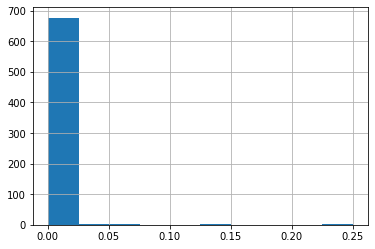

In [74]:
data_model.var().hist()

In [108]:
all_inputs = data_model[data_model.columns[1:]].values
all_labels = data_model['label'].values
all_inputs.shape

(1977, 682)

In [109]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=.003, )
all_inputs = sel.fit_transform(all_inputs)
all_inputs.shape

(1977, 331)

In [110]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
results_1 = []; names = []; seed=42
for name, model in models_2:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

LR, 0.7881171171171173, 0.04969124620775182))
RC, 0.7826936936936938, 0.051189771869929714))
LSVC, 0.7786936936936937, 0.04580185407670623))
SGDC, 0.7712252252252252, 0.04275615691124125))
P, 0.7482612612612612, 0.056759996332541786))
PAC, 0.7529819819819819, 0.0516768088571144))
BNB, 0.7401891891891892, 0.04429070998884122))
NC, 0.7422162162162163, 0.047079398541871396))
SVM, 0.8056486486486486, 0.045765456301713164))


## **2.** UFS SelectKBest Select K Best
it removes all but the highest scoring features

In [111]:
all_inputs = data_model[data_model.columns[1:]].values
all_labels = data_model['label'].values
all_inputs.shape

(1977, 682)

In [112]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
all_inputs = SelectKBest(chi2, k=400).fit_transform(all_inputs, all_labels)
all_inputs.shape

(1977, 400)

In [113]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
results_2 = []; names = []; seed=42
for name, model in models_2:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

LR, 0.8238378378378378, 0.0445909398811805))
RC, 0.7914504504504505, 0.0542417304986636))
LSVC, 0.8123603603603604, 0.043691015056743415))
SGDC, 0.7873873873873874, 0.046776627900936264))
P, 0.7746126126126127, 0.048948256595261995))
PAC, 0.7888468468468468, 0.04926730094716265))
BNB, 0.7806486486486487, 0.049988048242847936))
NC, 0.7833513513513515, 0.04879156185653716))
SVM, 0.8150450450450452, 0.0608376584044751))


## **3.** `UFS `SelectFpr` False Positive Rate test.
Filter: Select the p values below alpha based on a FPR test. a smaller p-value bears more significance as it can tell you that the hypothesis may not explain the observation fairly. If one or more of these probabilities turn out to be less than or equal to α, the level of significance, we reject the null hypothesis. For a true null hypothesis, p can take on any value between 0 and 1 with equal likeliness. For a true alternative hypothesis, p-values likely fall closer to 0.

In [115]:
all_inputs = data_model[data_model.columns[1:]].values
all_labels = data_model['label'].values
all_inputs.shape

(1977, 682)

In [116]:
from sklearn.feature_selection import SelectFpr, chi2
all_inputs = SelectFpr(chi2, alpha= 0.1
                       ).fit_transform(all_inputs, all_labels)
all_inputs.shape

(1977, 449)

In [117]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
results_3 = []; names = []; seed=42
for name, model in models_2:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

LR, 0.8366576576576576, 0.038581851809092176))
RC, 0.806972972972973, 0.04517498735124215))
LSVC, 0.8197927927927928, 0.04207831328979548))
SGDC, 0.8252612612612612, 0.05094218528269583))
P, 0.7935495495495495, 0.055786751789190084))
PAC, 0.7557477477477477, 0.06313333022225677))
BNB, 0.7806666666666666, 0.04470088706546632))
NC, 0.7840450450450451, 0.04408970627591881))
SVM, 0.8427297297297297, 0.040517441868014814))


## **4.** Feature selection using SelectFromModel
L1-based feature selection
Meta-transformer for selecting features based on importance weights.

In [118]:
all_inputs = data_model[data_model.columns[1:]].values
all_labels = data_model['label'].values
all_inputs.shape

(1977, 682)

In [119]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=1, penalty="l1", dual=False ).fit(all_inputs, all_labels)
model = SelectFromModel(lsvc, prefit=True )
all_inputs = model.transform(all_inputs)
all_inputs.shape

(1977, 419)

In [120]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
results_4 = []; names = []; seed=42
for name, model in models_2:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

LR, 0.834, 0.04013741917242849))
RC, 0.8131081081081082, 0.04751159944488863))
LSVC, 0.8123873873873875, 0.04194244261863086))
SGDC, 0.800918918918919, 0.039478785016236896))
P, 0.7982612612612613, 0.044623551432214636))
PAC, 0.7934504504504505, 0.05097297854588386))
BNB, 0.8009279279279278, 0.05073383329455481))
NC, 0.8069009009009009, 0.05706932664030927))
SVM, 0.8245495495495495, 0.05131311600079994))


## **5.** Sequential Feature Selection 
(Selecting features based on importance)
The features with the highest absolute coef_ value are considered the most important. 

In [121]:
all_inputs = data_model[data_model.columns[1:]].values
all_labels = data_model['label'].values
all_inputs.shape

(1977, 682)

Feature importance from coefficients

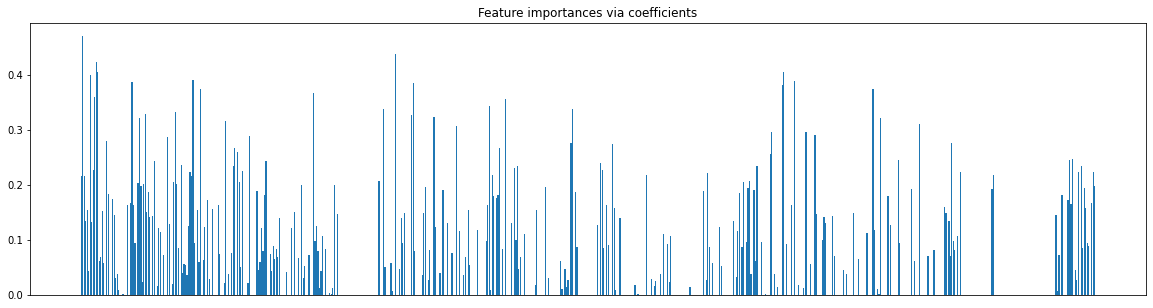

In [123]:
from sklearn.linear_model import LassoCV
 
lasso = LassoCV().fit(all_inputs, all_labels)
importance = np.abs(lasso.coef_)
feature_names = np.array(all_labels)
plt.figure(figsize=(20, 5))
plt.bar(height=importance, x=data_model.columns[1:])
plt.title("Feature importances via coefficients")
plt.xticks([])
plt.show()

In [124]:
np.sort(importance)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [206]:
importance = [i for i in importance if i != 0]
len(importance)

297

In [226]:
all_inputs = data_model[data_model.columns[1:]].values
all_labels = data_model['label'].values
all_inputs.shape

(1977, 682)

In [227]:
from sklearn.feature_selection import SelectFromModel

threshold = np.sort(importance)[-200] 
 
 
sfm = SelectFromModel(lasso, threshold=threshold).fit(all_inputs, all_labels)
selected_Features = data_model.columns[1:][sfm.get_support()]

In [228]:
all_inputs = data_model[selected_Features].values
all_labels = data_model['label'].values
all_inputs.shape

(1977, 200)

In [229]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_5 = []
names = []
seed=42
for name, model in models_2:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold,          scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

LR, 0.8521801801801802, 0.03773690527806847))
RC, 0.84609009009009, 0.04254269639022997))
LSVC, 0.8420630630630631, 0.033785464222470925))
SGDC, 0.8279189189189189, 0.03872312591308302))
P, 0.7948738738738739, 0.05812036954230517))
PAC, 0.8049729729729729, 0.04598300572160949))
BNB, 0.8508108108108108, 0.038741001400503815))
NC, 0.8514864864864864, 0.03718116904056562))
SVM, 0.8393513513513515, 0.04264984754934616))


##  **6.** Principal Component Analysis

In [231]:
all_inputs = data_model[data_model.columns[1:]].values
all_labels = data_model['label'].values
all_inputs.shape

(1977, 682)

In [232]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
pca.fit(all_inputs)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [338]:
#print(pca.explained_variance_)

In [233]:
all_inputs = pca.transform(all_inputs)
all_inputs.shape

(1977, 200)

In [234]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
results_6 = []
names = []
seed=42
for name, model in models_2:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_6 = cross_val_score(model, X_train, y_train, cv=kfold,          scoring='accuracy')
    results_6.append(cv_results_6)
    names.append(name)
    print(f"{name}, {cv_results_6.mean()}, {cv_results_6.std()}))")

LR, 0.786018018018018, 0.05244628156779206))
RC, 0.7867117117117117, 0.053640213858756045))
LSVC, 0.7752432432432432, 0.04449857348231378))
SGDC, 0.7624054054054054, 0.053518556955894685))
P, 0.7388828828828827, 0.05820984459375622))
PAC, 0.7308018018018018, 0.06376997547383954))
BNB, 0.6242522522522522, 0.06004025379125711))
NC, 0.782, 0.04586609914088785))
SVM, 0.7786396396396398, 0.04542686733587984))


## Classification Comparison of Feature Selection Methods

In [235]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [236]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd


In [237]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [238]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [239]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [240]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [241]:
dfresults = pd.DataFrame(results_6)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_6']= df_mean
classification_comparison['sd_6']= df_sd

In [242]:
values= ['Acc', 'SD']

In [243]:
FS_Methods=['1_RFLVar', '2_UFSKBest','3_UFSFpr',
     '4_FSU', '5_SFS', '6_PCA']

In [244]:
idx = pd.MultiIndex.from_product([FS_Methods, values],
                                 names=['FS_Methods', 'values'])

classification_comparison.columns = idx
classification_comparison

FS_Methods 1_RFLVar      2_UFSKBest      3_UFSFpr  ... 4_FSU 5_SFS      6_PCA     
values          Acc   SD        Acc   SD      Acc  ...    SD   Acc   SD   Acc   SD
LR             0.79 0.05       0.82 0.05     0.84  ...  0.04  0.85 0.04  0.79 0.05
RC             0.78 0.05       0.79 0.06     0.81  ...  0.05  0.85 0.04  0.79 0.06
LSVC           0.78 0.05       0.81 0.04     0.82  ...  0.04  0.84 0.03  0.78 0.05
SGDC           0.77 0.04       0.79 0.05     0.83  ...  0.04  0.83 0.04  0.76 0.05
P              0.75 0.06       0.77 0.05     0.79  ...  0.05  0.79 0.06  0.74 0.06
PAC            0.75 0.05       0.79 0.05     0.76  ...  0.05  0.81 0.05  0.73 0.07
BNB            0.74 0.05       0.78 0.05     0.78  ...  0.05  0.85 0.04  0.62 0.06
NC             0.74 0.05       0.78 0.05     0.78  ...  0.06  0.85 0.04  0.78 0.05
SVM            0.81 0.05       0.81 0.06     0.84  ...  0.05  0.84 0.04  0.78 0.05

[9 rows x 12 columns]

In [245]:
classification_comparison.to_csv('Classification Comparison of Feature Selection Methods.csv', index= False)

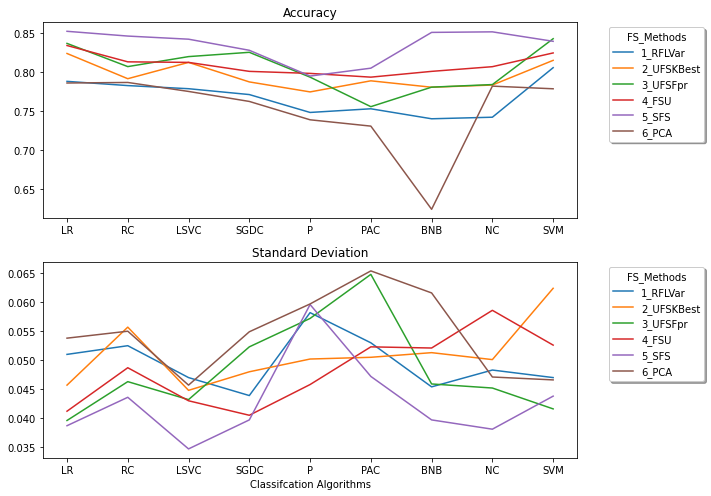

In [246]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [247]:
classification_comparison.T.max()

LR     0.85
RC     0.85
LSVC   0.84
SGDC   0.83
P      0.80
PAC    0.81
BNB    0.85
NC     0.85
SVM    0.84
dtype: float64

In [248]:
classification_comparison.T['LR']

FS_Methods  values
1_RFLVar    Acc      0.79
            SD       0.05
2_UFSKBest  Acc      0.82
            SD       0.05
3_UFSFpr    Acc      0.84
            SD       0.04
4_FSU       Acc      0.83
            SD       0.04
5_SFS       Acc      0.85
            SD       0.04
6_PCA       Acc      0.79
            SD       0.05
Name: LR, dtype: float64

In [249]:
classification_comparison.T['RC']

FS_Methods  values
1_RFLVar    Acc      0.78
            SD       0.05
2_UFSKBest  Acc      0.79
            SD       0.06
3_UFSFpr    Acc      0.81
            SD       0.05
4_FSU       Acc      0.81
            SD       0.05
5_SFS       Acc      0.85
            SD       0.04
6_PCA       Acc      0.79
            SD       0.06
Name: RC, dtype: float64

The max accuracy was by using Sequential Feature Selection

##  Selected Feature

In [250]:
all_inputs = data_model[selected_Features].values
all_labels = data_model['label'].values
all_inputs.shape

(1977, 200)

In [251]:
selected_Features_list=list(selected_Features)
selected_Features_list.append('label')
selected_Features_list[-1]

'label'

In [258]:
data_model= data_model[selected_Features_list]

In [259]:
data_model.shape

(1977, 201)

In [260]:
data_model['label'].value_counts()

1    999
0    978
Name: label, dtype: int64

In [254]:
data_model.to_csv('New_df.csv', index= False)

In [361]:
!mv New_df.csv data/

# Step 5:  Building the classifier

## Using lazy predict

In [ ]:
!pip install lazypredict

In [261]:
all_inputs = data_model[data_model.columns[:-1]].values
all_labels = data_model['label'].values
all_inputs.shape

(1977, 200)

In [262]:
import lazypredict 
from lazypredict.Supervised import LazyClassifier
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.1, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 30/30 [00:10<00:00,  2.87it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.86,0.86,0.86,0.86,0.03
KNeighborsClassifier,0.85,0.85,0.85,0.85,0.17
BernoulliNB,0.85,0.85,0.85,0.85,0.03
LinearDiscriminantAnalysis,0.84,0.84,0.84,0.84,0.16
NuSVC,0.84,0.84,0.84,0.84,1.00
RidgeClassifierCV,0.84,0.84,0.84,0.84,0.12
RidgeClassifier,0.84,0.84,0.84,0.84,0.04
SVC,0.84,0.84,0.84,0.84,0.86
LinearSVC,0.84,0.84,0.84,0.84,0.77


In [559]:
models.loc['NearestCentroid']

Accuracy            0.87
Balanced Accuracy   0.87
ROC AUC             0.87
F1 Score            0.87
Time Taken          0.05
Name: NearestCentroid, dtype: float64

In [544]:
from sklearn.neighbors import NearestCentroid

In [263]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.1, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
cls = NearestCentroid()
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.8636363636363636
--------------------------------------------------------
------- Confusion Matrix --------

[[97  8]
 [19 74]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       105
           1       0.90      0.80      0.85        93

    accuracy                           0.86       198
   macro avg       0.87      0.86      0.86       198
weighted avg       0.87      0.86      0.86       198

--------------------------------------------------------


# Hyperparameter Optimization

## **1.** LR Tuning Using Random Search

In [264]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.1, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
cls = LogisticRegression()
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.8434343434343434
--------------------------------------------------------
------- Confusion Matrix --------

[[96  9]
 [22 71]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.89      0.76      0.82        93

    accuracy                           0.84       198
   macro avg       0.85      0.84      0.84       198
weighted avg       0.85      0.84      0.84       198

--------------------------------------------------------


In [265]:
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(all_inputs, all_labels)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8492582337760002
Best Hyperparameters: {'C': 14.028057068813272, 'penalty': 'l2', 'solver': 'liblinear'}


In [267]:
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.1, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
cls = LogisticRegression(C= 14.028057068813272, penalty= 'l2', solver= 'liblinear')
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.8484848484848485
--------------------------------------------------------
------- Confusion Matrix --------

[[96  9]
 [21 72]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.89      0.77      0.83        93

    accuracy                           0.85       198
   macro avg       0.85      0.84      0.85       198
weighted avg       0.85      0.85      0.85       198

--------------------------------------------------------


# Using Neural Networks

In [425]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [386]:
Xn = scale(bow.drop('label', axis=1).values)
yn = bow['label'].values
Xn.shape

(1977, 210)

In [387]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn,
                                                    test_size=0.2,
                                                    random_state=42)

## Logistic Regression Model

In [461]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(210,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(Xn_train, yn_train,epochs=50)
result = model.evaluate(Xn_test, yn_test)

Epoch 1/50
50/50 [==============================] - 0s 966us/step - loss: 0.8028 - accuracy: 0.5966
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.6561
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6034 - accuracy: 0.6893
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 0.5441 - accuracy: 0.7455
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.7558
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.7956
Epoch 7/50
50/50 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8178
Epoch 8/50
50/50 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8238
Epoch 9/50
50/50 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8202
Epoch 10/50
50/50 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8432
Epoch 11/50
50/50

In [462]:
historydf = pd.DataFrame(history.history, index=history.epoch)

Text(0.5, 1.0, 'Test accuracy: 87.6 %')

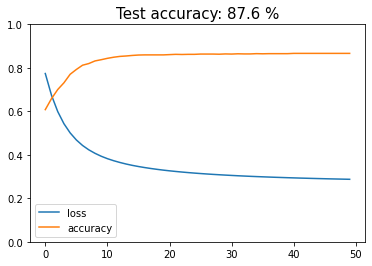

In [463]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

## Learning Rates

In [432]:
dflist = []

learning_rates = [0.001,0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(210,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0,epochs=50)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [433]:
historydf = pd.concat(dflist, axis=1)

In [434]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

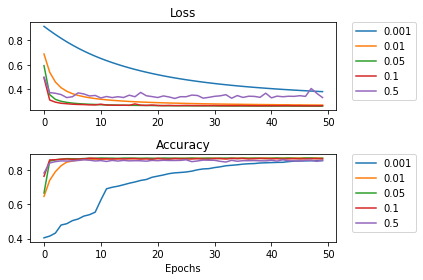

In [435]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Loss")


ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

In [436]:
historydf.xs('accuracy', axis=1, level='metric').max()

learning_rate
0.001    0.856099
0.010    0.871838
0.050    0.871838
0.100    0.870152
0.500    0.861158
dtype: float64

## Batch Sizes

In [495]:
dflist = []

batch_sizes = [5*10**6,5*10**7,5*10**6]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(210,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=.05),
                  metrics=['accuracy'])
    h = model.fit(Xn_train, yn_train, batch_size=batch_size, verbose=0,epochs=350)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [496]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

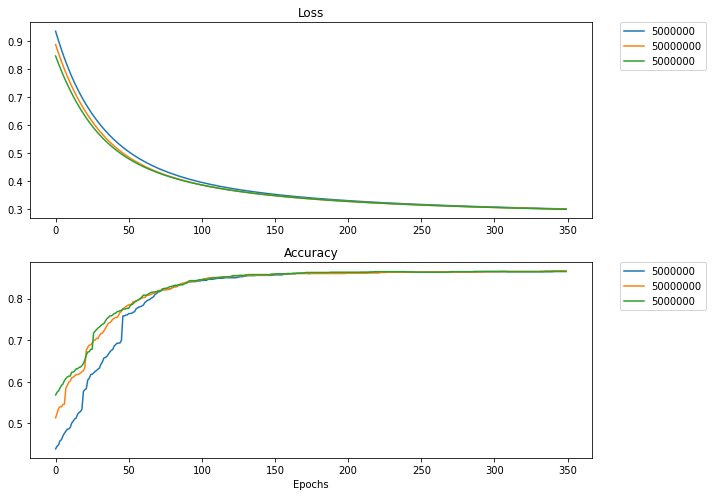

In [499]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ax=ax)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

In [500]:
historydf.xs('accuracy', axis=1, level='metric').max()

batch_size
5000000     0.865275
50000000    0.866540
5000000     0.865275
dtype: float64

## Optimizers

In [505]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop, Adamax

In [506]:
dflist = []

optimizers = ['SGD(lr=0.5)',
              'SGD(lr=0.05, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.05)',
              'Adagrad(lr=0.05)',
              'Adamax(lr=0.05)',
              'RMSprop(lr=0.05)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(210,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(Xn_train, yn_train, batch_size=5*10**6, epochs=50, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [507]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

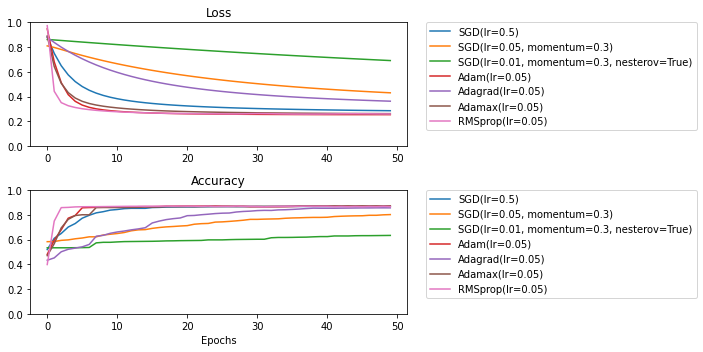

In [508]:
import matplotlib as mpl
mpl.rc('figure', figsize=(10, 5))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

In [509]:
historydf.xs('accuracy', axis=1, level='metric').max()

optimizers
SGD(lr=0.5)                                  0.867173
SGD(lr=0.05, momentum=0.3)                   0.801392
SGD(lr=0.01, momentum=0.3, nesterov=True)    0.633144
Adam(lr=0.05)                                0.870335
Adagrad(lr=0.05)                             0.855787
Adamax(lr=0.05)                              0.870335
RMSprop(lr=0.05)                             0.869703
dtype: float64

## Initialization

In [510]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(210,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='Adamax',
                  metrics=['accuracy'])

    h = model.fit(Xn_train, yn_train, batch_size=5*10**6, epochs=50, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [512]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

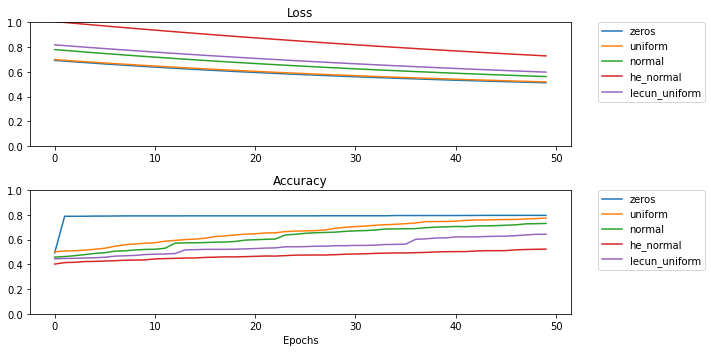

In [513]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

In [514]:
historydf.xs('accuracy', axis=1, level='metric').max()

initializers
zeros            0.795066
uniform          0.772929
normal           0.729918
he_normal        0.522454
lecun_uniform    0.642631
dtype: float64

## Step 6:  Reproducibility

In [ ]:
!pip install watermark

In [ ]:
%load_ext watermark

In [ ]:
%watermark -a 'Hazim' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

Hazim Tue Dec 29 2020 

CPython 3.6.9
IPython 5.5.0

numpy 1.19.4
pandas 1.1.5
sklearn 0.0
matplotlib 3.2.2
seaborn 0.11.0

compiler   : GCC 8.4.0
system     : Linux
release    : 4.19.112+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
